### Capstone project: Sentiment analysis on scientific papers reviews.

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# # Re-enable warnings
# import warnings
# warnings.filterwarnings('default')

In [3]:
!pip install fsspec
!pip install -U spacy
!pip install keras tensorflow
!pip install sentiment-analysis-spanish
!python -m spacy download es_core_news_sm
!pip install es-lemmatizer
!pip install spacy_spanish_lemmatizer

Requirement already up-to-date: spacy in c:\users\isanj\anaconda3\lib\site-packages (3.0.5)


[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


2021-04-18 16:24:22.585939: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-04-18 16:24:22.587244: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
#https://pypi.org/project/sentiment-analysis-spanish/

import pandas as pd
import numpy as np
import nltk
import json
import re
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sentiment_analysis_spanish import sentiment_analysis

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

%matplotlib inline


In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\isanj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
# Load the data file

with open('C://Users//isanj//Downloads//reviews.json', encoding="UTF-8") as f:
    data = json.load(f)    
    
#print(data)    
    

In [7]:
# Create a dataframe

reviews_df= pd.DataFrame.from_dict(data) 
  
reviews_df.head()

,paper
0,"{'id': 1, 'preliminary_decision': 'accept', 'r..."
1,"{'id': 2, 'preliminary_decision': 'accept', 'r..."
2,"{'id': 3, 'preliminary_decision': 'accept', 'r..."
3,"{'id': 4, 'preliminary_decision': 'accept', 'r..."
4,"{'id': 5, 'preliminary_decision': 'accept', 'r..."


In [8]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html

# Split a column into multiple columns
df2 = pd.json_normalize(reviews_df['paper'])
df2

,id,preliminary_decision,review
0,1,accept,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,2,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,3,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,4,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,5,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...,...,...
167,168,accept,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,169,accept,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,170,reject,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,171,accept,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [9]:
# Rename the "id" column as "book_id"

df2.rename(columns={'id':'book_id'}, inplace=True)
df2

,book_id,preliminary_decision,review
0,1,accept,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,2,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,3,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,4,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,5,accept,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...,...,...
167,168,accept,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,169,accept,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,170,reject,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,171,accept,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [10]:
# Delect the CSV file

# I'm doing this, because it can happened that I run my notebook many times, and I will like to have a last version of my CSV file each time.
if os.path.exists("decision.csv"):
    os.remove("decision.csv")
else:
    print("The file does not exist")

In [11]:
# Save df2 dataframe in a csv file
df2.to_csv('decision.csv')

In [12]:
# Check for NaN under an entire DataFrame
df2.isnull().values.any()

False

In [13]:
# Extracting just the 'review' column

column = ['review']
df3 = pd.DataFrame(df2, columns=column)
df3


,review
0,"[{'confidence': '4', 'evaluation': '1', 'id': ..."
1,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
2,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
3,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
4,"[{'confidence': '4', 'evaluation': '2', 'id': ..."
...,...
167,"[{'confidence': '3', 'evaluation': '2', 'id': ..."
168,"[{'confidence': '3', 'evaluation': '1', 'id': ..."
169,"[{'confidence': '5', 'evaluation': '-1', 'id':..."
170,"[{'confidence': '4', 'evaluation': '-1', 'id':..."


In [14]:
# Use stack to unlist the list the column 'review'
df3_new = df3.apply(lambda x: x.apply(pd.Series).stack()).reset_index().drop('level_1', 1)
df3_new

,level_0,review
0,0,"{'confidence': '4', 'evaluation': '1', 'id': 1..."
1,0,"{'confidence': '4', 'evaluation': '1', 'id': 2..."
2,0,"{'confidence': '5', 'evaluation': '1', 'id': 3..."
3,1,"{'confidence': '4', 'evaluation': '2', 'id': 1..."
4,1,"{'confidence': '4', 'evaluation': '2', 'id': 2..."
...,...,...
400,169,"{'confidence': '5', 'evaluation': '-1', 'id': ..."
401,169,"{'confidence': '4', 'evaluation': '-1', 'id': ..."
402,170,"{'confidence': '4', 'evaluation': '-1', 'id': ..."
403,170,"{'confidence': '3', 'evaluation': '1', 'id': 2..."


In [15]:
# Use concat to unnest the dictionary and put it into seperate columns
df3_new =  pd.concat([df3_new, df3_new['review'].apply(pd.Series), df3_new.drop('review', axis=1, inplace = True)], axis=1)
df3_new

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,2,es,0,,,2010-07-05
...,...,...,...,...,...,...,...,...,...
400,169,5,-1,1,es,-2,,El trabajo pretende ofrecer una visión del uso...,2015-07-05
401,169,4,-1,2,es,-1,,El paper está bien escrito y de fácil lectura....,2015-07-05
402,170,4,-1,1,es,0,,Observación de fondo: No se presenta un ejemp...,2015-07-05
403,170,3,1,2,es,-1,,Se propone un procedimiento para elaborar máqu...,2015-07-05


In [16]:
# # Use concat to unnest the dictionary and put it into seperate columns
# df3_new = pd.concat([df3.drop('review', axis=1, inplace = True), df3_new['review'].apply(pd.Series)], axis=1)
# df3_new

In [17]:
#get the dataframe columns
cols = df3_new.columns 

#print the columns' names
#print(cols)

In [18]:
# Check for NaN under an entire DataFrame
df3_new.isnull().values.any()

True

In [19]:
# I can see have some missing data

df3_new["text"].iloc[40]

''

In [20]:
# Shape before dropping empty rows text
df3_new.shape

(405, 9)

In [21]:
# Drop empty rows text

filter_na = df3_new["text"] != ''
df4 = df3_new[filter_na]

In [22]:
# Shape after dropping empty rows text
df4.shape

(399, 9)

In [23]:
df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
5,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [24]:
#Fix indexes

df4 = df4.reset_index(drop = True)

df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      399 non-null    int64 
 1   confidence   397 non-null    object
 2   evaluation   399 non-null    object
 3   id           399 non-null    int64 
 4   lan          399 non-null    object
 5   orientation  399 non-null    object
 6   remarks      399 non-null    object
 7   text         399 non-null    object
 8   timespan     399 non-null    object
dtypes: int64(2), object(7)
memory usage: 28.2+ KB


In [26]:
# Delect the CSV file

# I'm doing this, because it can happened that I run my notebook many times, and I will like to have a last version of my CSV file each time.
if os.path.exists("toTranslate.csv"):
    os.remove("toTranslate.csv")
else:
    print("The file does not exist")


The file does not exist


In [27]:
# Save df4 dataframe in a csv file
df4.to_csv('toTranslate.csv')

### Identified reviews based on the language

In [28]:
df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [29]:
df4.lan.unique()

array(['es', 'en'], dtype=object)

In [30]:
# Count each unique value

df4.lan.value_counts()

es    382
en     17
Name: lan, dtype: int64

In [31]:
df4.groupby('lan').describe()

level_0                                                           id  \
      count       mean        std  min   25%   50%     75%    max  count   
lan                                                                        
en     17.0  58.647059  62.012036  2.0   7.0  32.0  127.00  161.0   17.0   
es    382.0  86.065445  48.741252  0.0  41.0  92.5  125.75  171.0  382.0   

                                                  
         mean       std  min  25%  50%  75%  max  
lan                                               
en   1.882353  0.781213  1.0  1.0  2.0  2.0  3.0  
es   1.832461  0.824935  1.0  1.0  2.0  2.0  4.0

In [32]:
# English reviews

df4_english = df4[df4['lan']=='en']
df4_english

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
6,2,3,2,2,en,1,,This paper aims to show new deployment alterna...,2010-07-05
7,2,3,0,3,en,-1,,The paper is well structured. It follows a log...,2010-07-05
18,7,4,1,1,en,0,,The paper describes an experience concerning t...,2010-07-05
19,7,4,2,2,en,1,,This manuscript addresses an interesting solut...,2010-07-05
20,7,5,1,3,en,0,,Interesting application domain. Nothing new f...,2010-07-05
29,11,3,2,2,en,0,,This paper presents a software tool that is us...,2010-07-05
45,18,4,2,1,en,1,,"This paper is very interesting, I like the ide...",2010-07-05
73,29,4,-2,1,en,-1,,I don't think the work reported in this paper ...,2010-07-05
83,32,4,-1,2,en,-1,Unless there is a strong info sci and business...,Abstract: Needs to have a definition of ERP - ...,2010-07-05
94,37,4,2,1,en,0,,The paper introduces a segmentation procedure ...,2010-07-05


In [33]:
# Spanish reviews

df4_spanish = df4[df4['lan']=='es']
df4_spanish.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05


In [34]:
##############################################################################

#### Identify the languages by myself

In [35]:
!pip install langid

In [36]:
import langid # language identification (i.e. what language is this?)

In [37]:
# Identified languages 

diff_languages = (df4['text']).apply(langid.classify)
diff_languages.head()

0    (es, -2286.3553416728973)
1      (es, -2561.28048992157)
2     (es, -4911.551350593567)
3     (es, -4179.394695520401)
4     (es, -7130.180345535278)
Name: text, dtype: object

In [38]:
# Extract just the language 
langs = diff_languages.apply(lambda tuple: tuple[0])
langs.unique()
#langs

array(['es', 'en', 'lt'], dtype=object)

In [39]:
# Count the english 
print(sum(langs== "en"))   # The result is higher "23 texts in english, against the 17 expected". I have to find out why?

17


In [40]:
# Put everything in a list 
langs_list = list(langs)
#langs_list

In [41]:
# List of the indexes of all the reviews in english
res_list = [] 
for i in range(0, len(langs_list)) : 
    if langs_list[i] == str('en') : 
        res_list.append(i)
        
#res_list        

In [42]:
# Let check for empty string in the list of texts

for i in res_list:
    if (df4["text"].iloc[i]== ''):
        print(i)    

In [43]:
print(sum(langs=="es"))

381


In [44]:
#  Check if any missing values in the spanish texts

for i in range(0, len(langs_list)): 
    if langs_list[i] == "es":
        if (df4["text"].iloc[i]== ''):
            print(i)
        else:
            break
print("No missing values")

No missing values


In [45]:
print(sum(langs=="lt"))

1


In [46]:
for i in range(0, len(langs_list)):
    if langs_list[i] == "lt":
        print(df4["text"].iloc[i])

NO ME ENCUENTRO CAPACITADO PARA EFECTUAR ESTA REVISION. ESTA MUY LEJOS DE MI ESPECIALIZACION.


In [47]:
#####################################################################

In [48]:
# Length of all the text reviews
df4["length"] = df4["text"].apply(len)
df4.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938


<AxesSubplot:ylabel='Frequency'>

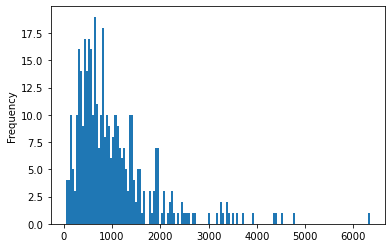

In [49]:
# Visualize the length of the reviews

#df4["length"].plot.hist(bins=50)
#df4["length"].plot.hist(bins=100)
df4["length"].plot.hist(bins=150)

In [50]:
df4["length"].describe()

count     399.000000
mean     1020.105263
std       829.020524
min        41.000000
25%       473.000000
50%       811.000000
75%      1287.500000
max      6345.000000
Name: length, dtype: float64

In [51]:
# # The longest review

# df4[df4["length"]==6345]["text"].iloc[0]

<AxesSubplot:xlabel='length'>

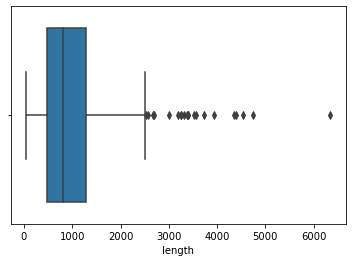

In [52]:
# finding outlier in the texts'lenght
sns.boxplot(x = df4['length'])

### Text Pre-processing using NLTK

In [53]:
# Using spanish text from the original dataset.

In [54]:
df4_spanish.shape

(382, 9)

In [55]:
# Checking for missing values
df4_spanish.isnull().sum()

level_0        0
confidence     2
evaluation     0
id             0
lan            0
orientation    0
remarks        0
text           0
timespan       0
dtype: int64

In [56]:
def cleanText(review):
    
    # split into words

    tokens = word_tokenize(review)
        
    # convert to lower case
    review_tokens = [w.lower() for w in tokens]
        
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    review_no_punct = [w.translate(table) for w in review_tokens]
    
    # remove remaining tokens that are not alphabetic
    
    review_tokens_new = [word for word in review_no_punct if word.isalpha()]
    
    # filter out stop words
    clean_token = [w for w in review_tokens_new if not w in stop_words]
    

    
    return clean_token
        

In [57]:
df4_spanish['New_text'] = (df4_spanish["text"]).apply(cleanText)

df4_spanish.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,New_text
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,"[artículo, aborda, problema, contingente, rele..."
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,"[artículo, presenta, recomendaciones, práctica..."
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,"[tema, interesante, puede, ser, mucha, ayuda, ..."
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,"[explica, forma, ordenada, didáctica, experien..."
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,"[autores, describen, metodología, desarrollar,..."


In [58]:
# Lemmatization

lemmatizer = WordNetLemmatizer()
def lemm(words):
    new = []
    lemma_words = [lemmatizer.lemmatize(x) for x in words]
    new.append(lemma_words)
    return new



df4_spanish["text_lemmatized"] = (df4_spanish['New_text']).apply(lemm)

df4_spanish.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,New_text,text_lemmatized
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,"[artículo, aborda, problema, contingente, rele...","[[artículo, aborda, problema, contingente, rel..."
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,"[artículo, presenta, recomendaciones, práctica...","[[artículo, presenta, recomendaciones, práctic..."
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,"[tema, interesante, puede, ser, mucha, ayuda, ...","[[tema, interesante, puede, ser, mucha, ayuda,..."
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,"[explica, forma, ordenada, didáctica, experien...","[[explica, forma, ordenada, didáctica, experie..."
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,"[autores, describen, metodología, desarrollar,...","[[autores, describen, metodología, desarrollar..."


In [59]:
# Seems like NLTK doesn't work well on Spanish Lemmatization 

### Text Pre-processing using SpaCy

In [60]:
import spacy
import es_core_news_sm
import spacy_spanish_lemmatizer
from spacy.lang.es.stop_words import STOP_WORDS


In [61]:
nlp = es_core_news_sm.load()

In [62]:
# Extract just Spanish reviews
df4_spanish_spacy = df4[df4['lan']=='es']

In [63]:
#List punctuation
punctuations = list(string.punctuation)
punctuations

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [64]:
len(punctuations)

32

In [65]:
# This list doesn't have the upside down question mark "¿"

In [66]:
# Data cleaning
# convert to lower-case, remove square brackets, numbers, and punctuations
def text_clean(review):
    review = review.lower()
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = re.sub('\n', '', review)# remove new lines
    review =re.sub('¿', '', review) # Remove "¿"(It isn't part of the punctuations list) 
    review = re.sub('…', '', review)
    review = re.sub('“', '', review)
    review = re.sub('”', '', review)
    review = re.sub('¡', '', review)
    review = re.sub(',,', '', review)
    return review

review_clean = lambda x: text_clean(x)


In [67]:
df4_spanish_spacy['new_text'] = df4_spanish_spacy["text"].apply(text_clean)
df4_spanish_spacy.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575,el artículo aborda un problema contingente y ...
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618,el artículo presenta recomendaciones prácticas...
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,el tema es muy interesante y puede ser de muc...
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,se explica en forma ordenada y didáctica una e...
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938,los autores describen una metodología para des...


In [68]:
# If the substring doesn’t exist in the text, -1 is returned. 
# Otherwise it will return the position first occurrence of character in the string.

df4_spanish_spacy['new_text'].str.find("¿").unique() # I'm using unique to see how many different characters in the column

array([-1], dtype=int64)

In [69]:
# Build list of stopwords
stopwords = list(STOP_WORDS)
stopwords

['dos',
 'varias',
 'mismos',
 'debido',
 'puedo',
 'ustedes',
 'ésos',
 'habían',
 'los',
 'habla',
 'tenido',
 'segunda',
 'soyos',
 'nunca',
 'últimas',
 'embargo',
 'aquellas',
 'cuantos',
 'afirmó',
 'uso',
 'lejos',
 'ser',
 'quiere',
 'momento',
 'tendrá',
 'demasiado',
 'cuánto',
 'incluso',
 'trata',
 'encima',
 'entre',
 'suyo',
 'realizado',
 'hicieron',
 'lo',
 'día',
 'segun',
 'haya',
 'no',
 'cuanto',
 'tuyo',
 'considera',
 'fueron',
 'indicó',
 'estados',
 'días',
 'vuestros',
 'ahí',
 'aún',
 'verdadera',
 'sabemos',
 'mia',
 'sera',
 'quizas',
 'bajo',
 'ademas',
 'buena',
 'éstos',
 'les',
 'aunque',
 'voy',
 'somos',
 'claro',
 'si',
 'siendo',
 'anterior',
 'podeis',
 'existen',
 'allí',
 'paìs',
 'arribaabajo',
 'tuyas',
 'antaño',
 'consiguen',
 'detras',
 'pasada',
 'último',
 'tal',
 'seis',
 'quien',
 'hablan',
 'todo',
 'cuatro',
 'podrias',
 'hoy',
 'delante',
 'través',
 'mí',
 'mal',
 'aquí',
 'proximo',
 'cuanta',
 'lugar',
 'éstas',
 'me',
 'podemos',
 

In [70]:
len(stopwords)

551

In [71]:
#Create a custom stopwords 
custom_stop_word_list=['más', 'o', 'a', 'etcétera', 'etc' ]

In [72]:
# Final stopwords list

final_stopword_list = custom_stop_word_list + stopwords

In [73]:
# Remove stop words

df4_spanish_spacy['new_text'] = df4_spanish_spacy['new_text'].apply(lambda x: " ".join(word for word in x.split() if word not in final_stopword_list))

df4_spanish_spacy['new_text'].head()

0    artículo aborda problema contingente y relevan...
1    artículo presenta recomendaciones prácticas de...
2    tema interesante y ayuda guía incorporar práct...
3    explica forma ordenada y didáctica experiencia...
4    autores describen metodología desarrollar form...
Name: new_text, dtype: object

In [74]:
# Lemmatization
def lemm(review):
    nlp=spacy.load("es_core_news_sm")
    doc = nlp(str(review))
    return " ".join([token.lemma_ for token in doc])

df4_spanish_spacy['Lemma_text'] = df4_spanish_spacy['new_text'].apply(lemm)
df4_spanish_spacy.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text,Lemma_text
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575,artículo aborda problema contingente y relevan...,artículo abordo problema contingente y relevan...
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618,artículo presenta recomendaciones prácticas de...,artículo presentar recomendación práctico desa...
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,tema interesante y ayuda guía incorporar práct...,tema interesante y ayuda guío incorporar práct...
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,explica forma ordenada y didáctica experiencia...,explicar forma ordenado y didáctico experienci...
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938,autores describen metodología desarrollar form...,autor describir metodología desarrollar forma ...


In [75]:
#Spacy seems to be better for spanish lemmatization

In [76]:
# Length of all the Lemma text reviews
df4_spanish_spacy["Lemma_length"] = df4_spanish_spacy["Lemma_text"].apply(len)
df4_spanish_spacy.head()

,level_0,confidence,evaluation,id,lan,orientation,remarks,text,timespan,length,new_text,Lemma_text,Lemma_length
0,0,4,1,1,es,0,,- El artículo aborda un problema contingente y...,2010-07-05,575,artículo aborda problema contingente y relevan...,artículo abordo problema contingente y relevan...,331
1,0,4,1,2,es,1,,El artículo presenta recomendaciones prácticas...,2010-07-05,618,artículo presenta recomendaciones prácticas de...,artículo presentar recomendación práctico desa...,433
2,0,5,1,3,es,1,,- El tema es muy interesante y puede ser de mu...,2010-07-05,1259,tema interesante y ayuda guía incorporar práct...,tema interesante y ayuda guío incorporar práct...,731
3,1,4,2,1,es,1,,Se explica en forma ordenada y didáctica una e...,2010-07-05,1350,explica forma ordenada y didáctica experiencia...,explicar forma ordenado y didáctico experienci...,911
4,1,4,2,3,es,0,,Los autores describen una metodología para des...,2010-07-05,1938,autores describen metodología desarrollar form...,autor describir metodología desarrollar forma ...,1178


In [77]:
# Delect the CSV file

# I'm doing this, because it can happened that I run my notebook many times, and I will like to have a last version of my CSV file each time.
if os.path.exists("lemma.csv"):
    os.remove("lemma.csv")
else:
    print("The file does not exist")

In [78]:
# Save this dataframe (df4_spanish_spacy) in a csv file
df4_spanish_spacy.to_csv('lemma.csv')


In [79]:
# Part of speech(POS) tagging

doc = nlp(df4_spanish_spacy["Lemma_text"].to_string(index=False))

for token in doc:
    print(token.text, token.pos_)

  SPACE
artículo NOUN
abordo ADJ
problema NOUN
contingente ADV
y CCONJ
relevan VERB
... PUNCT

  SPACE
artículo VERB
presentar VERB
recomendación NOUN
práctico ADJ
desa ADJ
... PUNCT

  SPACE
tema NOUN
interesante ADJ
y CCONJ
ayuda NOUN
guío VERB
incorporar VERB
práct NOUN
... PUNCT

  SPACE
explicar VERB
forma NOUN
ordenado ADJ
y CCONJ
didáctico ADJ
experienci ADJ
... PUNCT

  SPACE
autor NOUN
describir VERB
metodología NOUN
desarrollar VERB
forma NOUN
... PUNCT

  SPACE
proponer VERB
enfocar VERB
basado ADJ
apoyar VERB
recomendación NOUN
r CCONJ
... PUNCT

  SPACE
realizar VERB
modelamiento NOUN
encriptación NOUN
cuánticar VERB
n NOUN
... PUNCT

  SPACE
paper NOUN
involucra ADJ
desarrollo NOUN
aplicación NOUN
simule ADJ
p CCONJ
... PUNCT

  SPACE
novedoso ADJ
propuesta ADJ
estructurado ADJ
correctamente ADV
... PUNCT

  SPACE
tema NOUN
interesante ADJ
y CCONJ
estructurado ADJ
referir VERB
diseño ADJ
... PUNCT

  SPACE
alto ADJ
perfil NOUN
técnico ADJ
aportar VERB
temática NOUN
concis

vigilan VERB
... PUNCT

  SPACE
validación NOUN
cualitativo ADJ
utaut DET
evidencia VERB
estudio NOUN
... PUNCT

  SPACE
presentar VERB
revisión NOUN
sistema NOUN
inmún ADJ
artificial ADJ
y CCONJ
... PUNCT

  SPACE
artículo NOUN
revisión NOUN
utilidad NOUN
y CCONJ
formar VERB
concebir VERB
é CCONJ
... PUNCT

  SPACE
resumen NOUN
artículo ADJ
buscar VERB
mostrar VERB
aplicación NOUN
sis NOUN
... PUNCT

  SPACE
ambicioso ADJ
título NOUN
logro ADJ
expuesto ADJ
artículo NOUN
moder VERB
... PUNCT

  SPACE
artículo NOUN
presentar VERB
prueba NOUN
concepto ADJ
asociación NOUN
... PUNCT

  SPACE
impecable ADJ
presentado ADJ
enfocar VERB
tema NOUN
actualidad NOUN
e CCONJ
... PUNCT

  SPACE
base NOUN
científico ADJ
explicita ADJ
y CCONJ
aporte VERB
práctico ADJ
li DET
... PUNCT

  SPACE
mostrado ADJ
paper NOUN
documentado ADJ
presentar VERB
modelo NOUN
ex ADJ
... PUNCT

  SPACE
dar VERB
relevancia NOUN
temático ADJ
actualidad NOUN
entregar VERB
an NOUN
... PUNCT

  SPACE
estudio NOUN
efecto ADJ


laboratorio ADJ
i CCONJ
... PUNCT

  SPACE
artículo VERB
comprender VERB
ubicación NOUN
espacial ADJ
objeto NOUN
... PUNCT

  SPACE
artículo NOUN
interesante ADJ
considerado ADJ
objetivo NOUN
oscu ADJ
... PUNCT

  SPACE
presentar VERB
encuesta NOUN
minero ADJ
etapar VERB
arquitectura NOUN
... PUNCT

  SPACE
nombre NOUN
artículo NOUN
afectar VERB
e CCONJ
indicar VERB
resumen NOUN
apli ADJ
... PUNCT

  SPACE
artículo NOUN
presentar VERB
introducción NOUN
investigación NOUN
... PUNCT

  SPACE
artículir VERB
contribución NOUN
principal ADJ
discusión NOUN
uti ADJ
... PUNCT

  SPACE
artículo VERB
presentar VERB
análisis NOUN
teórico ADJ
sistema NOUN
sc INTJ
... PUNCT

  SPACE
aplicación NOUN
sistema ADJ
scado ADJ
minería VERB
interesante ADJ
l NOUN
... PUNCT

  SPACE
presentar VERB
arte NOUN
red NOUN
sensor ADJ
sub NOUN
acuático PROPN
uwsn ADJ
y CCONJ
... PUNCT

  SPACE
consistir VERB
artículo NOUN
tipo NOUN
survey NOUN
estudio ADJ
temátic ADJ
... PUNCT

  SPACE
escrito ADJ
tema NOUN
red NOU

... PUNCT

  SPACE
revisar VERB
redacción NOUN
documento NOUN
sitio NOUN
base ADJ
base NOUN
fa PROPN
... PUNCT

  SPACE
artículo NOUN
presentar VERB
aproximación NOUN
algoritmo ADP
gené ADV
... PUNCT

  SPACE
artículo VERB
mostrar VERB
estudio NOUN
aplicación NOUN
algoritmo ADJ
... PUNCT

  SPACE
artículo VERB
describir VERB
resultado NOUN
simulación NOUN
proble ADJ
... PUNCT

  SPACE
conclusión NOUN
cambiar VERB
paradigma NOUN
actual ADJ
desarrollo NOUN
... PUNCT

  SPACE
presentar VERB
evaluación NOUN
sistema ADJ
software NOUN
videocon ADJ
... PUNCT

  SPACE
artículo NOUN
presentar VERB
propuesto ADJ
modelo NOUN
evaluar VERB
ca NOUN
... PUNCT

  SPACE
realizar VERB
revisión NOUN
tipo NOUN
dato NOUN
abierto ADJ
chile NOUN
toma VERB
... PUNCT

  SPACE
dato NOUN
abierto ADJ
chile NOUN
analizar VERB
tema NOUN
adquirido ADJ
rea PROPN
... PUNCT

  SPACE
revisar VERB
redacción NOUN
documento NOUN
sitio NOUN
base ADJ
base NOUN
er ADJ
... PUNCT

  SPACE
campo NOUN
utilización NOUN
aplicación 

In [80]:
## Check if any forgotten punctuations
df4_spanish_spacy.Lemma_text[396]

'observación fondo presentar implementación interesante máquina secuencial metodolgía propuesto y tradicional cableado establecer comparativo y métrica desempeño observación formar siguiente corrección omitir punto título español páginar columna entrado y variable máquina secuencial págín columna justificación izquierdo págín columnar cantidad puerto entrado y salid págín columna completo dirección máquinar considerando sumo págín columna máquinar considerando sumar'

In [81]:
# Visualize dependencies and entities 
from spacy import displacy 

spacy.displacy.render(doc, style = 'dep')